<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-principiantes/blob/main/ES_TA_Cap%C3%ADtulo_07_Estrategias_de_Trading_Intermedias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>

# Estrategias de Trading Intermedias

### Resumen
* Gestionar los datos
* Media móvil
* Estrategia (varias condiciones)
* Gráfico
* Calcular el beneficio
* Automatización
* Comparar las estrategias
* Crear una cartera


<br>
<br>

💰 Únete a la comunidad de [Discord](https://discord.gg/wXjNPAc5BH)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.com/gp/product/B09HG18CYL)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [ ]:
!pip install yfinance
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import ta
warnings.filterwarnings("ignore")

In [ ]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# Manejar los datos

In [ ]:
# Preprocessing function

def preprocessing(name):
  
  # Import the data
  df = pd.read_csv(name, delimiter="\t", index_col="<DATE>", parse_dates=True)

  # Delete the two last columns
  df = df.iloc[:,:-2]

  # Rename
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "time"

  return df

In [ ]:
def preprocessing_yf(symbol):
  
  #Import the data
  df = yf.download("EURUSD=X").dropna()

  #Rename
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Remove adj close
  del df["adj close"]

  return df
df = preprocessing_yf("EURUSD=X")
df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume
time,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,0
...,...,...,...,...,...
2022-07-08,1.016984,1.019108,1.007973,1.016984,0
2022-07-11,1.016611,1.016777,1.005429,1.016611,0
2022-07-12,1.004753,1.007384,1.000110,1.004753,0


# Medias Móviles /RSI

In [ ]:
# Create Resistance using a rolling max
df["SMA fast"] = df["close"].rolling(30).mean()

# Create Support using a rolling min
df["SMA slow"] = df["close"].rolling(60).mean()


# Create RSI
df["rsi"] = ta.momentum.RSIIndicator(df["close"], window=10).rsi()

In [ ]:
df

,open,high,low,close,volume,SMA fast,SMA slow,rsi
time,,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0,NaN,NaN,NaN
2003-12-02,1.196101,1.210903,1.194600,1.208897,0,NaN,NaN,NaN
2003-12-03,1.209000,1.213003,1.207700,1.212298,0,NaN,NaN,NaN
2003-12-04,1.212004,1.214403,1.204398,1.208094,0,NaN,NaN,NaN
2003-12-05,1.207802,1.219096,1.206593,1.218695,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-07-08,1.016984,1.019108,1.007973,1.016984,0,1.053837,1.057603,22.015443
2022-07-11,1.016611,1.016777,1.005429,1.016611,0,1.051952,1.056521,21.844158
2022-07-12,1.004753,1.007384,1.000110,1.004753,0,1.049532,1.055297,17.126557


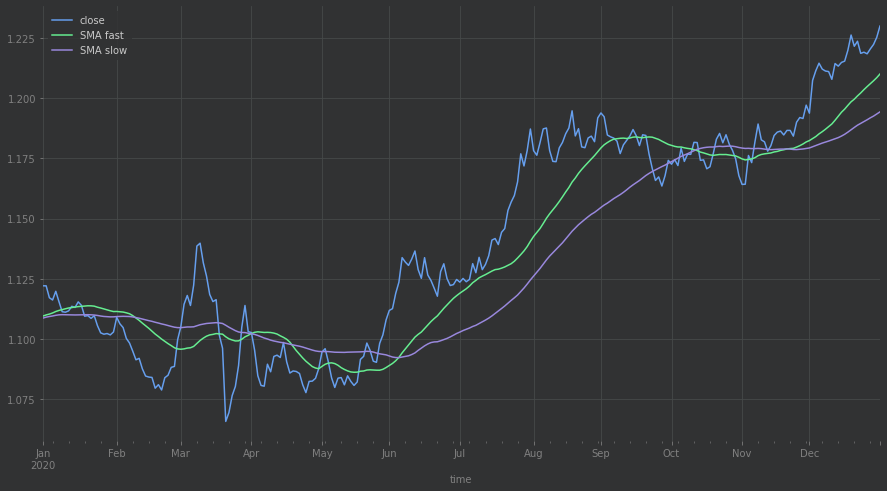

In [ ]:
# Plot the results
df[["close", "SMA fast", "SMA slow"]].loc["2020"].plot(figsize=(15,8))

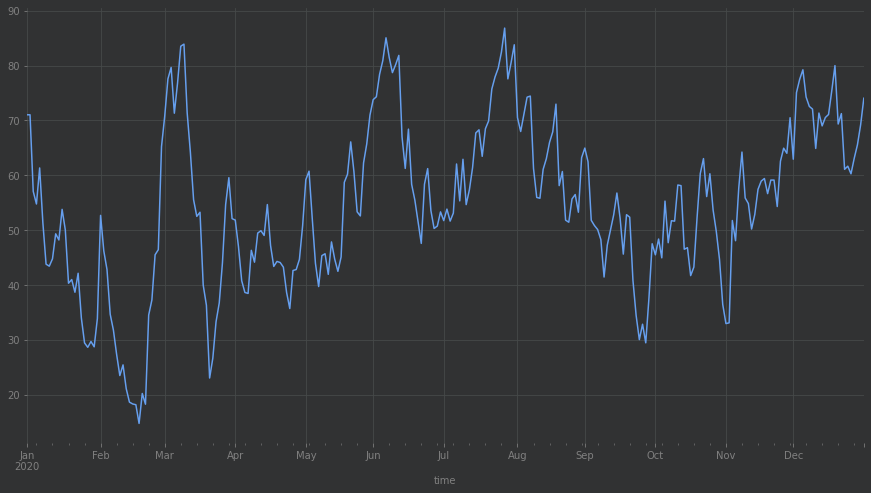

In [ ]:
df["rsi"].loc["2020"].plot(figsize=(15,8))

# Estrategia

In [ ]:
df["position"] = 0

# RSI yersteday
df["rsi yersteday"] = df["rsi"].shift(1)

# Conditions
condition_1_buy = df["SMA fast"] > df["SMA slow"]
condition_2_buy = df["rsi"] < df["rsi yersteday"]

condition_1_sell = df["SMA fast"] < df["SMA slow"]
condition_2_sell = df["rsi"] > df["rsi yersteday"]

# Create the condition
df.loc[condition_1_buy & condition_2_buy, "position"] = 1
df.loc[condition_1_sell & condition_2_sell, "position"] = -1

In [ ]:
df

,open,high,low,close,volume,SMA fast,SMA slow,rsi,position,rsi yersteday
time,,,,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0,NaN,NaN,NaN,0,NaN
2003-12-02,1.196101,1.210903,1.194600,1.208897,0,NaN,NaN,NaN,0,NaN
2003-12-03,1.209000,1.213003,1.207700,1.212298,0,NaN,NaN,NaN,0,NaN
2003-12-04,1.212004,1.214403,1.204398,1.208094,0,NaN,NaN,NaN,0,NaN
2003-12-05,1.207802,1.219096,1.206593,1.218695,0,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-07-08,1.016984,1.019108,1.007973,1.016984,0,1.053837,1.057603,22.015443,0,22.729821
2022-07-11,1.016611,1.016777,1.005429,1.016611,0,1.051952,1.056521,21.844158,0,22.015443
2022-07-12,1.004753,1.007384,1.000110,1.004753,0,1.049532,1.055297,17.126557,0,21.844158


# Verificación Gráfica

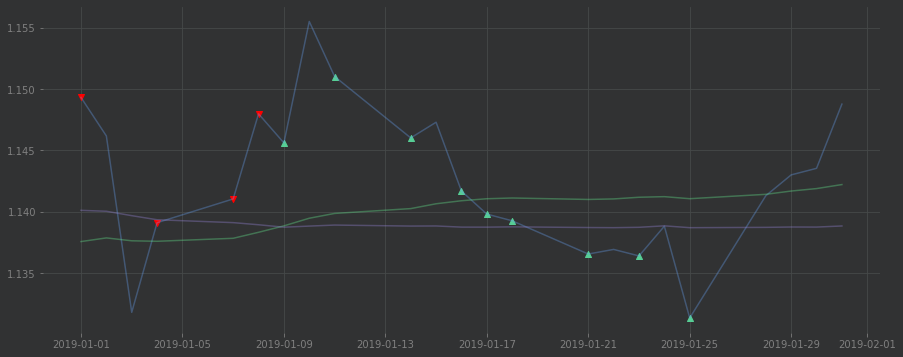

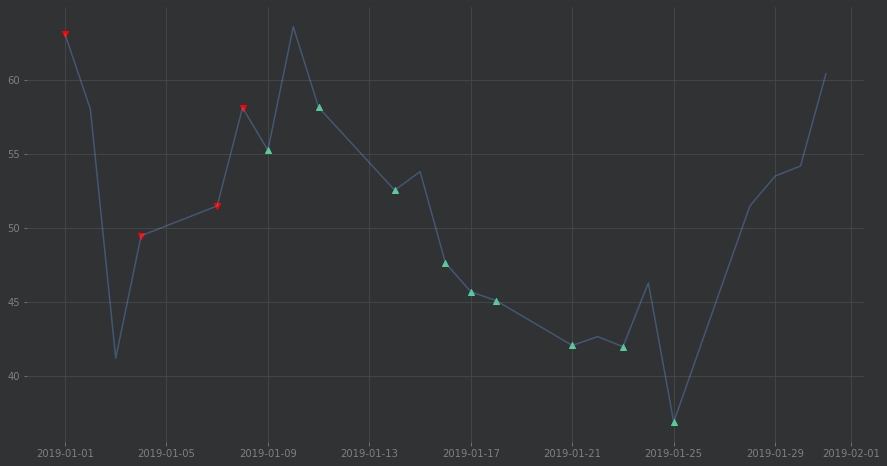

In [ ]:
# We plot all the signla to be sure that they be correct

year="2019-01"

# Select all signal in a index list to plot only this points
idx_open = df.loc[df["position"] == 1].loc[year].index
idx_close = df.loc[df["position"] == -1].loc[year].index



# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the open long signal in green and sell in red
plt.scatter(idx_open, df.loc[idx_open]["close"].loc[year], color= "#57CE95", marker="^")
plt.scatter(idx_close, df.loc[idx_close]["close"].loc[year], color= "red", marker="v")


# Plot the resistance to be sure that the conditions are completed
plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha=0.35)

plt.plot(df["close"].loc[year].index, df["SMA fast"].loc[year], alpha=0.35)

plt.plot(df["close"].loc[year].index, df["SMA slow"].loc[year], alpha=0.35)



# Show the graph
plt.show()
plt.close()


plt.figure(figsize=(15,8))
plt.scatter(idx_open, df.loc[idx_open]["rsi"].loc[year], color= "#57CE95", marker="^")
plt.scatter(idx_close, df.loc[idx_close]["rsi"].loc[year], color= "red", marker="v")

plt.plot(df["rsi"].loc[year].index, df["rsi"].loc[year], alpha=0.35)

plt.show()

# Calcular las Ganancias

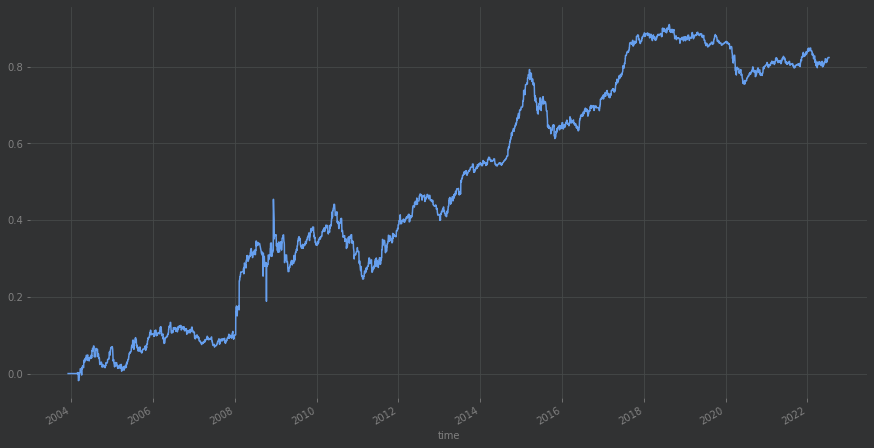

In [ ]:
# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = df["pct"] * (df["position"].shift(1))

df["return"].cumsum().plot(figsize=(15,8))


# Añadir el Stop loss


In [ ]:
# % = (SV - EV) / EV
df["Min"] = (df["low"] - df["close"].shift(1)) / df["close"].shift(1)

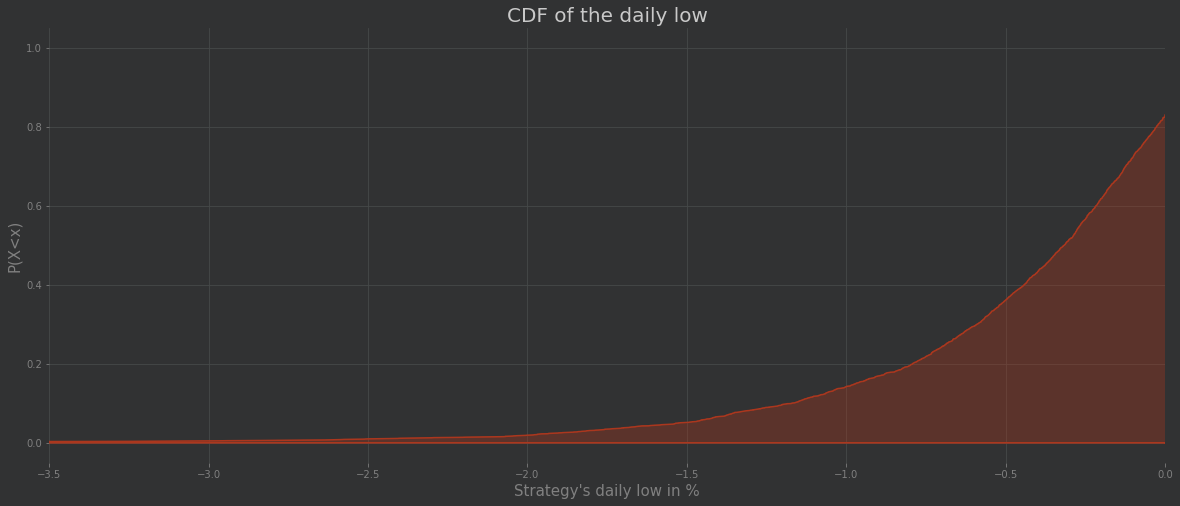

In [ ]:
# -------- Prepare the data ----------
# Remove missing values and order them
dfh = df[["Min"]].loc["2005":"2015"].dropna().sort_values(by="Min", ascending=True)

dfh.loc[df["Min"]<-0.3] = 0

# Weight for each value
dfh["probability"] = 1/len(dfh)


# -------- Plot the graph ----------
# Adapt the size
plt.figure(figsize=(20,8))

# Put a ylabel
plt.ylabel("P(X<x)", size=15)

# Put a xlabel
plt.xlabel("Strategy's daily low in %", size=15)

# Put a title
plt.title("CDF of the daily low", size=20)

# Plot the line of the CDF
plt.plot(dfh["Min"]*100, dfh["probability"].cumsum(), color="#AB371E")

# Plot the area of the CDF
plt.fill_between(dfh["Min"]*100,0, dfh["probability"].cumsum(), color="#AB371E", alpha=0.35)

# Define x limits
plt.xlim([-3.5, 0])

# Plot the graph
plt.show()

In [ ]:
dfh

,Min,probability
time,,
2008-03-17,0.000000,0.000352
2012-01-27,0.000000,0.000352
2008-12-09,-0.141373,0.000352
2008-10-09,-0.091788,0.000352
2008-02-11,-0.069678,0.000352
...,...,...
2008-09-08,0.053603,0.000352
2008-01-08,0.057678,0.000352
2008-02-08,0.073354,0.000352


In [ ]:
df["return SL"] = df["return"]

In [ ]:
sl = 0.05
df.loc[df["Min"]<-sl, "return SL"] = -sl

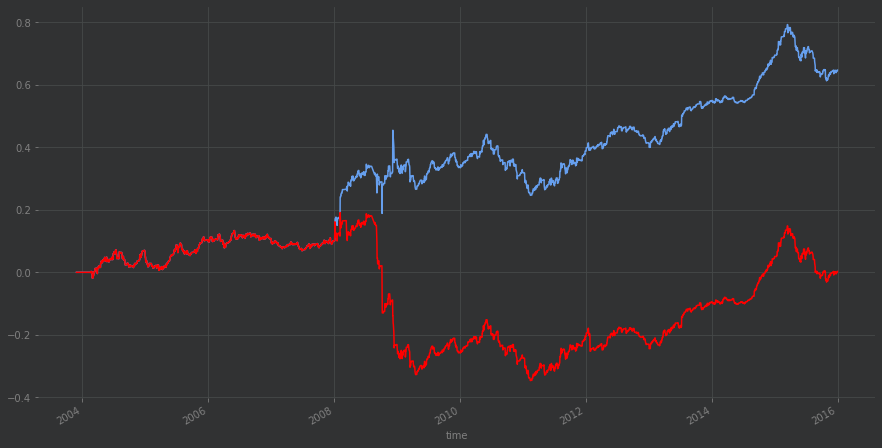

In [ ]:
# Train 
df["return"].loc[:"2015"].cumsum().plot(figsize=(15,8))
df["return SL"].loc[:"2015"].cumsum().plot(figsize=(15,8), color="red")

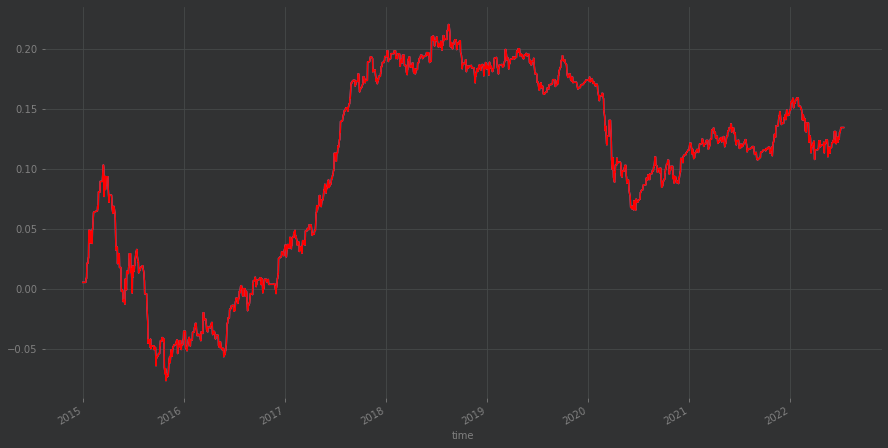

In [ ]:
# Test 
df["return"].loc["2015":].cumsum().plot(figsize=(15,8))
df["return SL"].loc["2015":].cumsum().plot(figsize=(15,8), color="red")


# Automatización

In [ ]:
def preprocessing_yf(symbol):
  df = yf.download(symbol).dropna()
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  return df

def preprocessing(name):

  # Import the data
  df = pd.read_csv(f"{name}", delimiter="\t", index_col="<DATE>", parse_dates=True)

  # Delete the two last columns
  df = df.iloc[:,:-2]

  # Rename
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "name"

  return df
  
def SMA_strategy(input, mt5=False, yf=False):

  if mt5:
    df = preprocessing(input)
  
  if yf:
    df = preprocessing_yf(input)

  
  # Create Resistance using a rolling max
  df["SMA fast"] = df["close"].rolling(30).mean()

  # Create Support using a rolling min
  df["SMA slow"] = df["close"].rolling(60).mean()

  # Create RSI
  df["rsi"] = ta.momentum.RSIIndicator(df["close"], window=10).rsi()


  df["position"] = 0

  df["rsi yersteday"] = df["rsi"].shift(1)
  # Create the condition
  df.loc[(df["SMA fast"] > df["SMA slow"]) & (df["rsi"] < df["rsi yersteday"]), "position"] = 1
  df.loc[(df["SMA fast"] < df["SMA slow"]) & (df["rsi"] > df["rsi yersteday"]), "position"] = -1

  

  df["pct"] = df["close"].pct_change(1)

  # Compute the return of the strategy

  df["return"] = df["pct"] * (df["position"].shift(1))
  

  return df["return"]

[*********************100%***********************]  1 of 1 completed


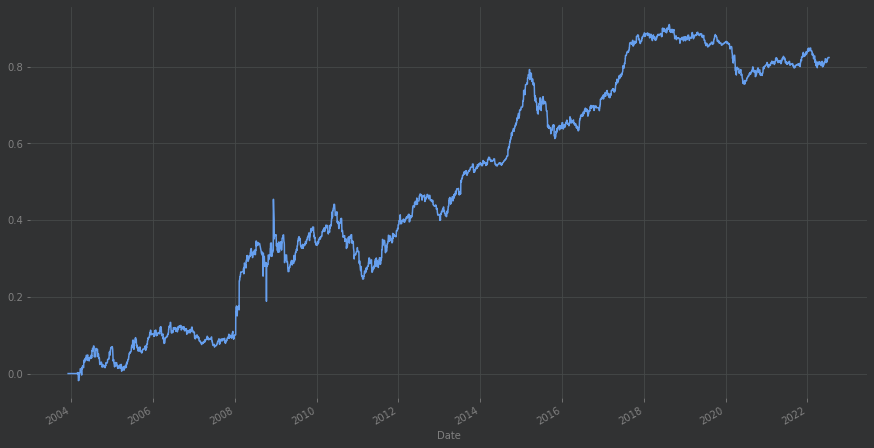

In [ ]:
SMA_strategy("EURUSD=X", yf=True).cumsum().plot(figsize=(15,8))

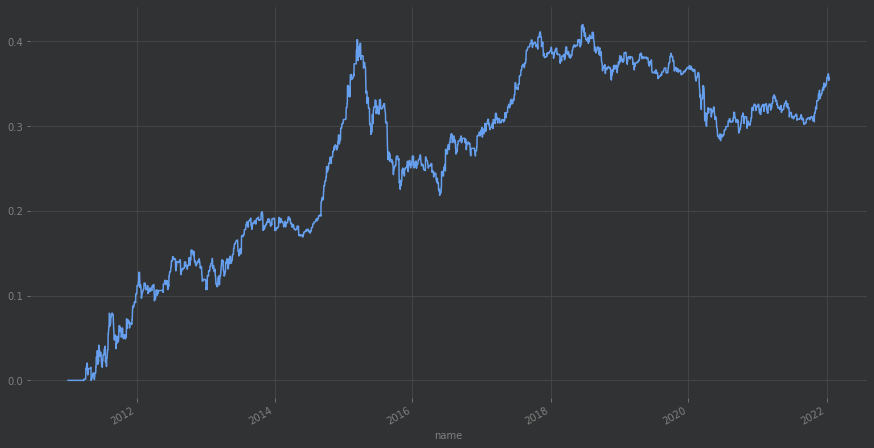

In [62]:
SMA_strategy("EURUSD_D1.csv", mt5=True).cumsum().plot(figsize=(15,8))

[*********************100%***********************]  1 of 1 completed


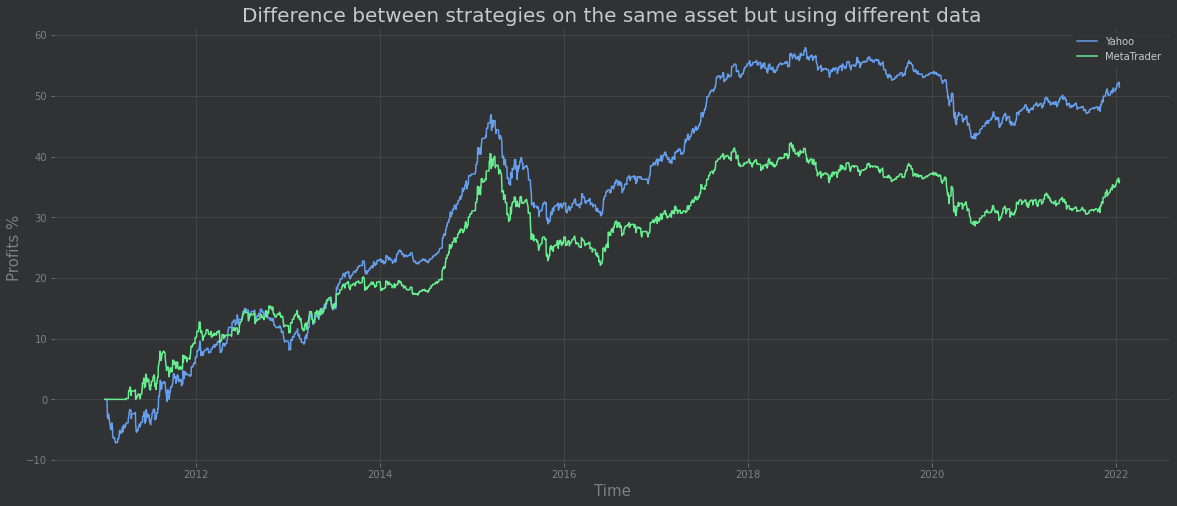

In [63]:
# Same strategy but with different assets
yahoo = SMA_strategy("EURUSD=X", yf=True)
metatrader = SMA_strategy("EURUSD_D1.csv", mt5=True)

returns = pd.DataFrame([yahoo, metatrader], index=["Yahoo",
                                                   "Broker"]).transpose().dropna().cumsum(axis=0)

# Plot on graph

# Adapt the size
plt.figure(figsize=(20,8))

# Plot the returns
plt.plot(returns["Yahoo"]*100, label="Yahoo")
plt.plot(returns["Broker"]*100, label="MetaTrader")

# Plot title + name axis 
plt.xlabel("Time", size=15)
plt.ylabel("Profits % ", size=15)
plt.title("Difference between strategies on the same asset but using different data", size=20)


# Plot legend 
plt.legend()
plt.show()

# Portfolio

[*********************100%***********************]  1 of 1 completed


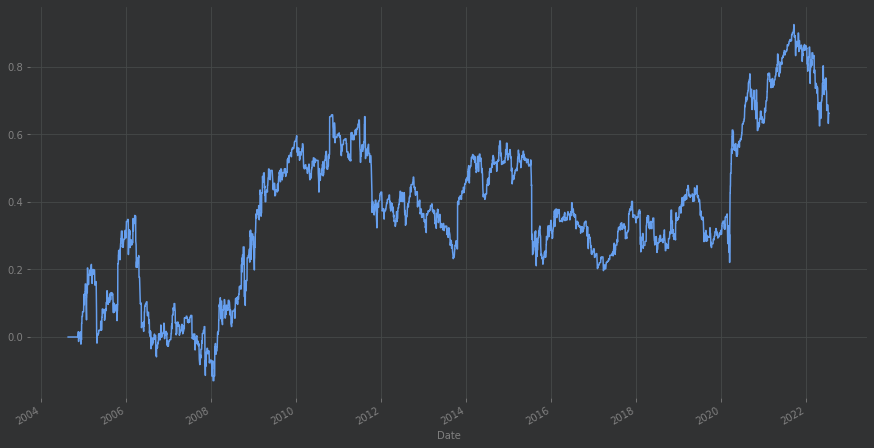

[*********************100%***********************]  1 of 1 completed


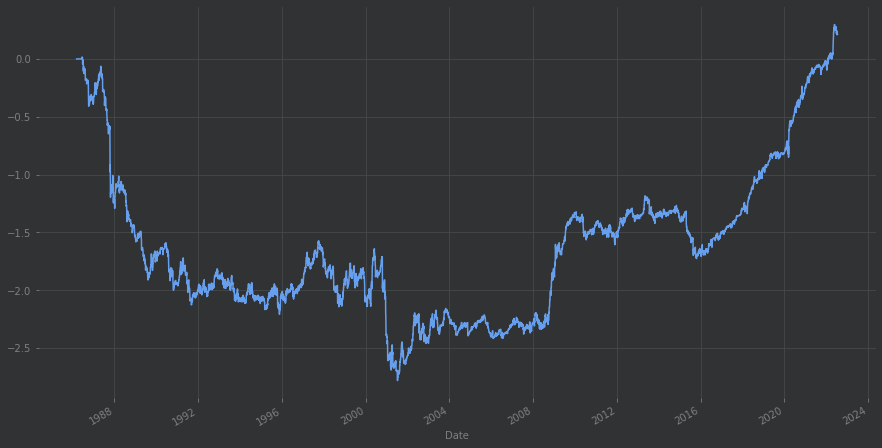

[*********************100%***********************]  1 of 1 completed


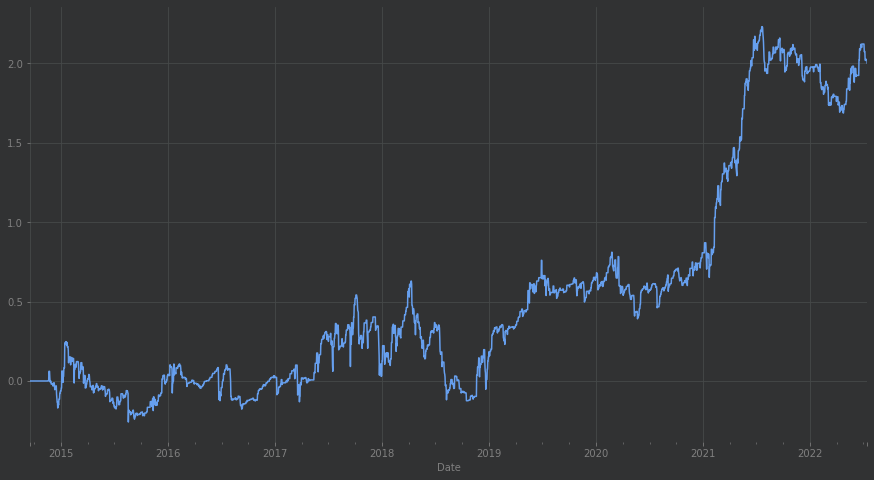

[*********************100%***********************]  1 of 1 completed


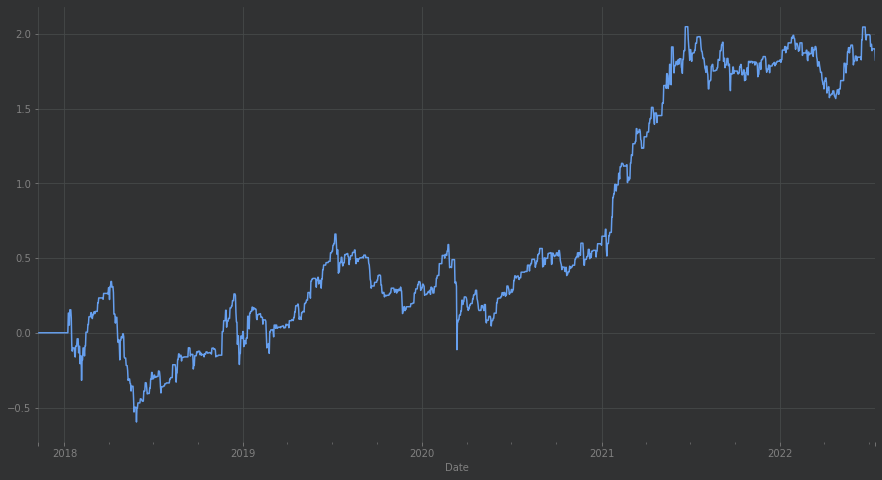

[*********************100%***********************]  1 of 1 completed


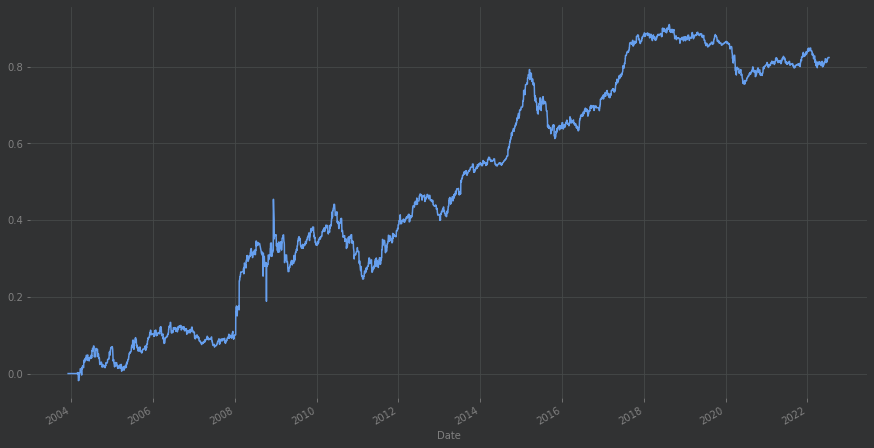

[*********************100%***********************]  1 of 1 completed


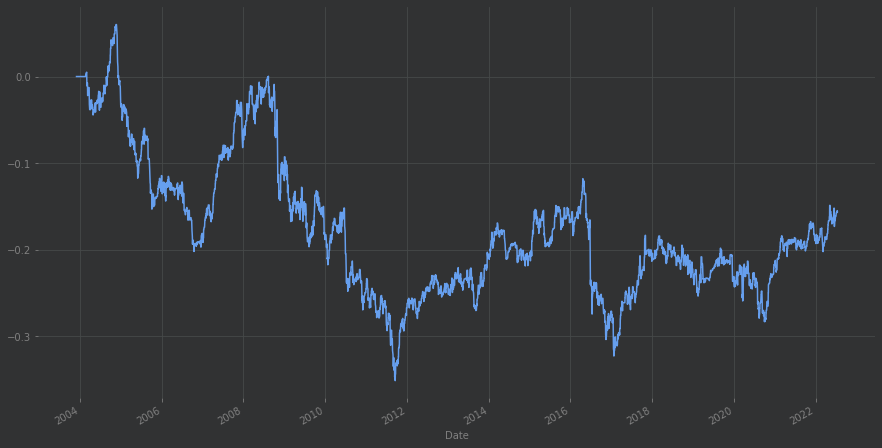

In [64]:
namelist = ["GOOG", "MSFT", "BTC-USD", "ETH-USD", "EURUSD=X", "GBPCAD=X"]
returns = []
for name in namelist:
  ret = SMA_strategy(name, yf=True)
  returns.append(ret)
  ret.cumsum().plot(figsize=(15,8))
  plt.show()
  plt.close()

In [65]:
pf = pd.DataFrame(returns, index=namelist).transpose().dropna()

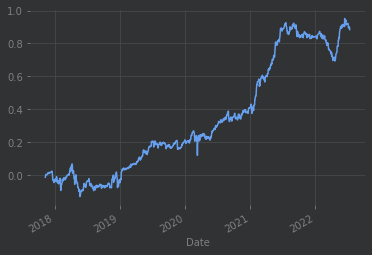

In [66]:
ret_pf = (pf.sum(axis=1)/len(namelist))
ret_pf.name="return"
ret_pf.cumsum(axis=0).plot()

In [67]:
def drawdown_function(serie):

  # We compute Cumsum of the returns
  cum = serie.dropna().cumsum() + 1

  # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
  running_max = np.maximum.accumulate(cum)

  # We compute drawdown
  drawdown = cum/running_max - 1
  return drawdown
def BackTest(serie, annualiazed_scalar=252):

  # Import the benchmark
  sp500 = yf.download("^GSPC")["Adj Close"].pct_change(1)
  
  # Change the name
  sp500.name = "SP500"

  # Concat the returns and the sp500
  val = pd.concat((serie,sp500), axis=1).dropna()
  # Compute the drawdown
  drawdown = drawdown_function(serie)*100
  
  # Compute max drawdown
  max_drawdown = -np.min(drawdown)




  # Put a subplots
  fig, (cum, dra) = plt.subplots(1,2, figsize=(20,6))
  
  # Put a Suptitle
  fig.suptitle("Backtesting", size=20)

  # Returns cumsum chart
  cum.plot(serie.cumsum()*100, color="#39B3C7")

  # SP500 cumsum chart
  cum.plot(val["SP500"].cumsum()*100, color="#B85A0F")

  # Put a legend
  cum.legend(["Portfolio", "SP500"])
  
  # Set individual title
  cum.set_title("Cumulative Return", size=13)

  cum.set_ylabel("Cumulative Return %", size=11)

  # Put the drawdown
  dra.fill_between(drawdown.index,0,drawdown, color="#C73954", alpha=0.65)

  # Set individual title
  dra.set_title("Drawdown", size=13)

  dra.set_ylabel("drawdown in %", size=11)

  # Plot the graph
  plt.show()


  # Compute the sortino
  sortino = np.sqrt(annualiazed_scalar) * serie.mean()/serie.loc[serie<0].std()

  # Compute the beta
  beta = np.cov(val[["return", "SP500"]].values,rowvar=False)[0][1] / np.var(val["SP500"].values)

  # Compute the alpha
  alpha = annualiazed_scalar * (serie.mean() - beta*serie.mean())

  # Print the statistics
  print(f"Sortino: {np.round(sortino,3)}")
  print(f"Beta: {np.round(beta,3)}")
  print(f"Alpha: {np.round(alpha*100,3)} %")
  print(f"MaxDrawdown: {np.round(max_drawdown,3)} %")

[*********************100%***********************]  1 of 1 completed


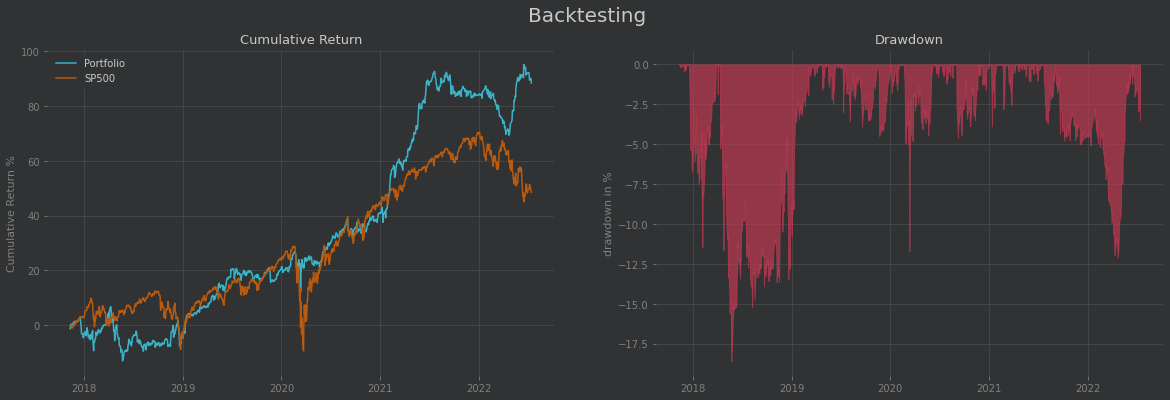

Sortino: 1.322
Beta: 0.094
Alpha: 17.215 %
MaxDrawdown: 18.586 %


In [68]:
BackTest(ret_pf)